In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

In [34]:
def plot_results(df, save_name):
    selected_rows = ["inaccurate", "wrong", "correct"]
    df_transposed = df.transpose()
    df_filtered = df_transposed.loc[selected_rows]
    rows_to_plot = ["HCC", "mCRC", "PACA"]

    palette = sns.color_palette("Blues", n_colors=len(selected_rows))

    for row in rows_to_plot:
        fig = plt.figure(figsize=(3,3))
        ax = sns.barplot(x=df_filtered.index, y=df_filtered[row], palette=palette, edgecolor="black")

        sns.despine(top=True)

        for p in ax.patches:
            ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha="center", va="center", xytext=(0, 10), textcoords="offset points", size=12)
        
        ax.tick_params(axis="x", labelsize=12)
        ax.tick_params(axis="y", labelsize=12)
        plt.xlabel("")
        plt.title(row)
        plt.ylabel("")
        ax.set_ylim(0., 80)
        fig.savefig(f"{os.getcwd()}/{save_name}_{row}.svg", format="svg", dpi=300, bbox_inches="tight")

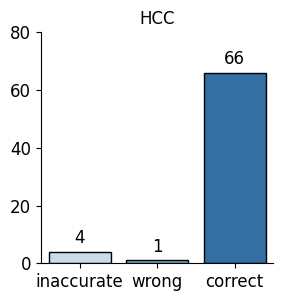

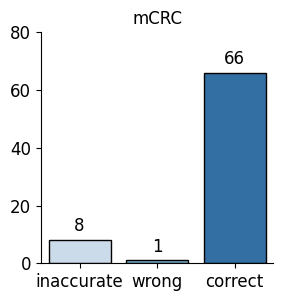

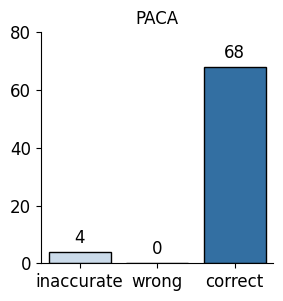

In [35]:
df = pd.read_csv("scores_GPT4_RAG.csv", header=0, index_col=0, delimiter=";")
df.drop(columns="all_samples", inplace=True)
df.drop(index="ALL", inplace=True)

plot_results(df, "RAG")

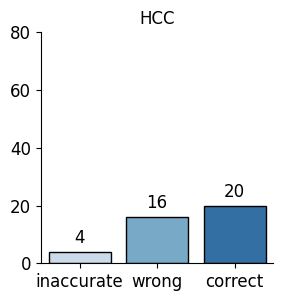

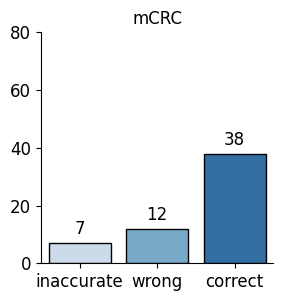

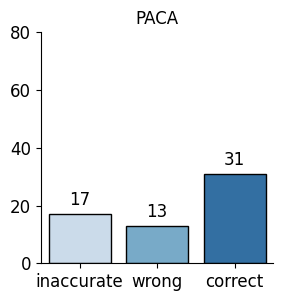

In [37]:
df = pd.read_csv("scores_GPT4_noRAG.csv", header=0, index_col=0, delimiter=";")
df.drop(columns="all_samples", inplace=True)
df.drop(index="ALL", inplace=True)

plot_results(df, "NoRAG")

In [6]:
########################################################################

import pandas as pd

rag_path = "../RetrievalEvaluations/faithfulness_relevancy_RAG.csv"
no_rag_path = "../RetrievalEvaluations/faithfulness_relevancy_noRAG.csv"

rag_retrieval = pd.read_csv(rag_path, index_col=0)
rag_retrieval["faithfulness"].sum(), rag_retrieval["relevancy"].sum()

no_rag_retrieval = pd.read_csv(no_rag_path, index_col=0)
no_rag_retrieval["faithfulness"].sum(), no_rag_retrieval["relevancy"].sum()

(30, 29)

In [40]:
def plot_results(df, save_name):
    columns_to_plot = ["faithfulness", "relevancy"]
    palette = sns.color_palette("Blues", n_colors=2)

    for column in columns_to_plot:
        counts = df[column].value_counts()
        
        if len(counts) == 1:
            fig, ax = plt.subplots(figsize=(1,3))
        else:
            fig, ax = plt.subplots(figsize=(1.5,3))

        ax = sns.barplot(x=counts.index, y=counts.values, palette=palette, edgecolor="black")
        
        sns.despine(top=True, right=True)

        for p in ax.patches:
            ax.annotate(f"{int(p.get_height())}", 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 10), 
                        textcoords='offset points', 
                        size=12)

        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.set_ylim(0, 40)
        ax.set_yticks([10, 20, 30, 40])
        plt.xlabel('')
        plt.ylabel('')
        plt.title(f"{column.capitalize()}", fontsize=14)

        ax.set_ylim(0, max(counts.values) + 10)

        fig.savefig(f"{os.getcwd()}/{save_name}_{column}_distribution.svg", format='svg', dpi=300, bbox_inches='tight')

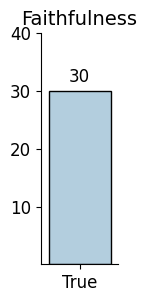

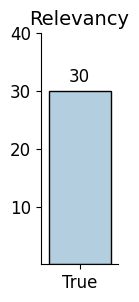

In [43]:
plot_results(rag_retrieval, "rag")

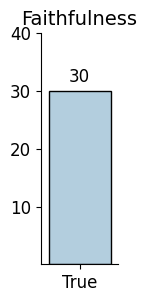

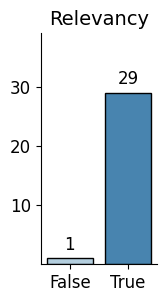

In [44]:
plot_results(no_rag_retrieval, "no_rag")

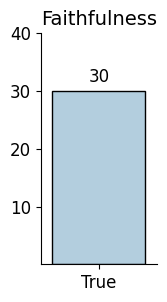

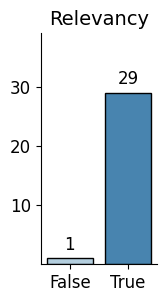

In [36]:
plot_results(no_rag_retrieval, "rag")